In [ ]:
import pandas as pd
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = kagglehub.dataset_download("pranavuikey/zomato-eda")
for filename in os.listdir(path):
    if filename.endswith('.csv'):
        filepath = os.path.join(path, filename)
        break


100%|██████████| 89.0M/89.0M [00:02<00:00, 37.8MB/s]

Extracting files...


# Data Exploration

In [ ]:
df = pd.read_csv(filepath)

In [ ]:
df.shape

(51717, 17)

In [ ]:
#check on missing values
df.isna().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [ ]:
#check datatypes
df.dtypes

,0
url,object
address,object
name,object
online_order,object
book_table,object
rate,object
votes,int64
phone,object
location,object
rest_type,object


# **Handling NA values**

---



In [ ]:
import numpy as np
#check persentage of missing data
missing_data_count = df.isnull().sum().sum()
all_data_count = np.product(df.shape)
print("Percentage of missing data:")
(missing_data_count/all_data_count)*100

Percentage of missing data:


4.288042730288937

**since the percentage of missing data is 4.28% (low percentage) it should be safe to try to drop the NA values and check the No. of rows**

In [ ]:
dropped_na = df.dropna()
print('no.of rows before dropping NAs:', df.shape[0])
print('no.of rows after dropping NAs:', dropped_na.shape[0])
print('no.of rows dropped:', df.shape[0] - dropped_na.shape[0])

no.of rows before dropping NAs: 51717
no.of rows after dropping NAs: 23193
no.of rows dropped: 28524


the number of rows dropped are huge, greater than 50% of the number of rows. that's a huge data loss, so we will try a different approach

**For the attributes dish_liked and menu_item, we can drop these columns since more than 50% of the values in them are na(in dish_liked) and '[]'(in menu_items, which represents a null menu item). These columns are useless because of the great lack of data in them.**

In [ ]:
df.drop(['dish_liked', 'menu_item'], axis=1, inplace=True)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


**Other columns that will not benefit us in the reseearch and calculations should be dropped as well. the columns are: url, address, name, phone, and reviews_list**

In [ ]:
df.drop(['url', 'address', 'name', 'phone', 'reviews_list'], axis=1, inplace=True)
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


**After dropping a couple of columns, let's try dropping the NA values again and check**


In [ ]:
dropped_na = df.dropna()
print('no.of rows before dropping NAs:', df.shape[0])
print('no.of rows after dropping NAs:', dropped_na.shape[0])
print('no.of rows dropped:', df.shape[0] - dropped_na.shape[0])

no.of rows before dropping NAs: 51717
no.of rows after dropping NAs: 43533
no.of rows dropped: 8184


The number of dropped rows is decent, so we will stick with it

In [ ]:
df = dropped_na
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43533 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 43533 non-null  object
 1   book_table                   43533 non-null  object
 2   rate                         43533 non-null  object
 3   votes                        43533 non-null  int64 
 4   location                     43533 non-null  object
 5   rest_type                    43533 non-null  object
 6   cuisines                     43533 non-null  object
 7   approx_cost(for two people)  43533 non-null  object
 8   listed_in(type)              43533 non-null  object
 9   listed_in(city)              43533 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


**some attributes here are objects even though they should be numerical, such as approx_cost(for two people), so we will change their types to float**

In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype('float64') #some costs are writtin like this: 1,000 which = 1000 so we just took away the comma to make it only a number
df['approx_cost(for two people)'].dtypes
#there are no NA values in it since we dropped the NA values earlier

dtype('float64')

**rate also needs to be converted to float, and /5 should be removed so it could become a numerical value.
First let's check on the unique values in rate**

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

**It seems there are 'NEW' and '-' values which probably shows that it has not been rated yet. This could be seen as it having an NA value in the beginning or as a default**

In [ ]:
df['rate'] = df['rate'].str.replace('/5', '')
df['rate'] = df['rate'].replace({'NEW': np.nan, '-': np.nan})
df['rate'] = df['rate'].astype('float64')

df['rate'].dtypes

dtype('float64')

In [ ]:
df['rate'].isna().sum()

2270

**Now let's see how we will handle the NA values in rate column**

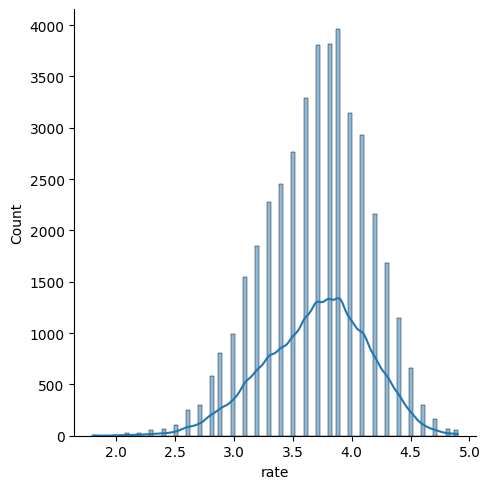

In [ ]:
sns.displot(df['rate'],kde=True)

**It's mosty normalized, so we will treat it as such and use the mean to repalce with NA values**

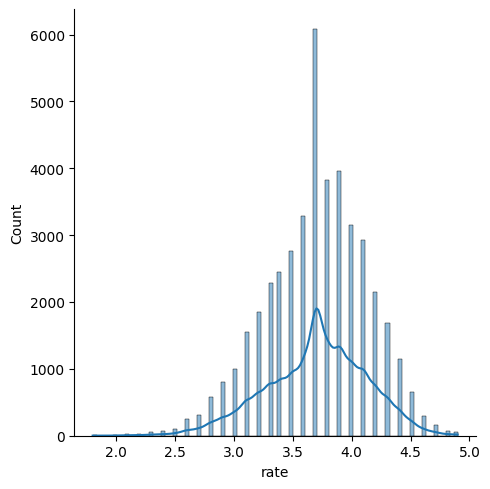

In [ ]:
df['rate'] = df['rate'].fillna(df['rate'].mean())
sns.displot(df['rate'],kde=True)

In [ ]:
df['rate'].head()

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8


In [ ]:
df.isna().sum().sum()

0

With this, there will be no Na values left

In [ ]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


# **Handling Outliers**

---



**Using IQR and quantile to handle outliers in the Rate , Votes and approx_cost(for two people) colums**

**visualizing the outliers on the boxplot**

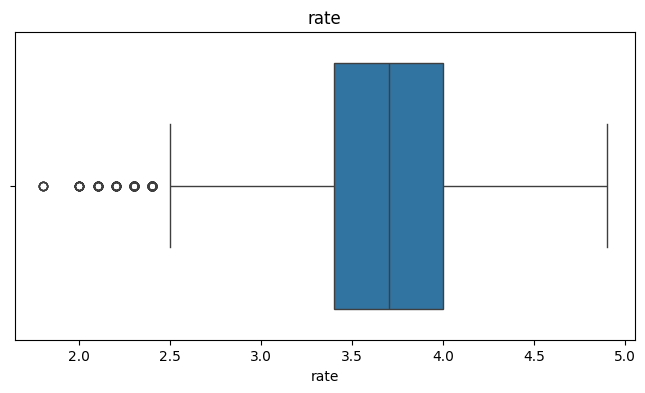

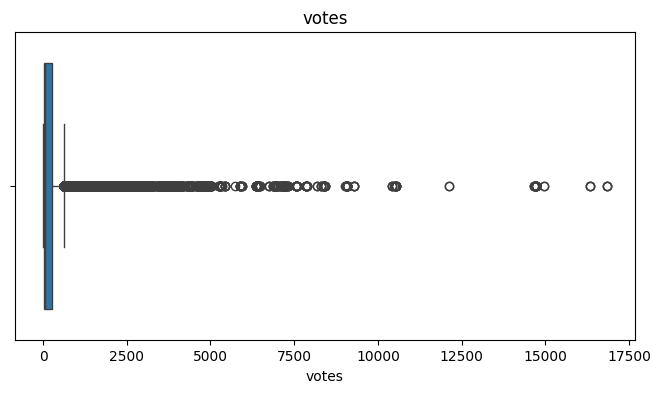

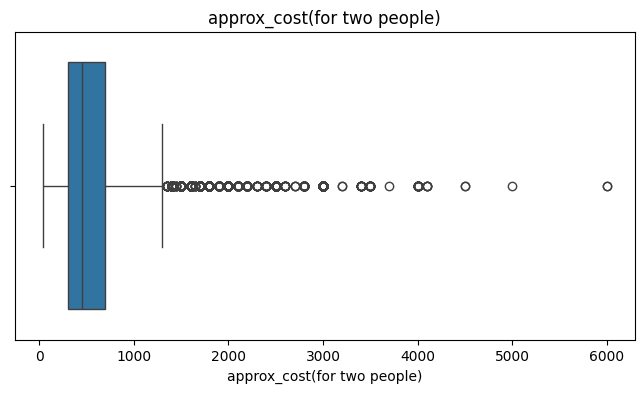

In [ ]:
numerical_columns = ['rate', 'votes', 'approx_cost(for two people)']
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"{column}")
    plt.show()


In [ ]:
df.shape

(43533, 10)

**Using IQR and quantile to handle outliers in the Rate , Votes and approx_cost(for two people) colums**

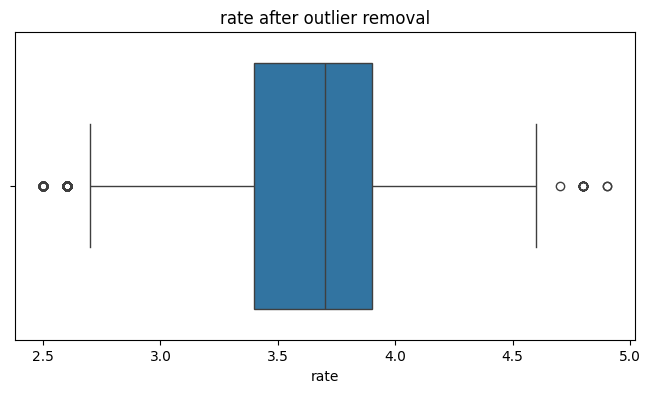

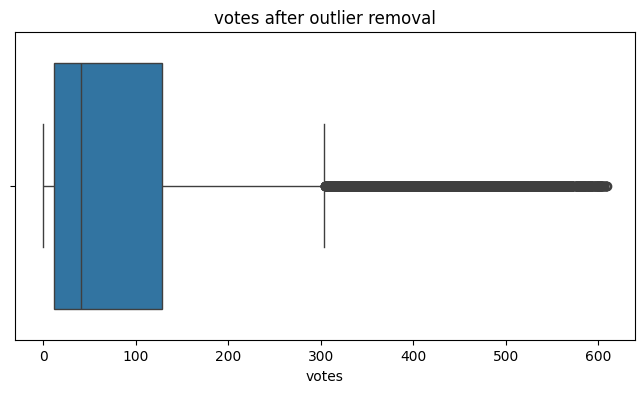

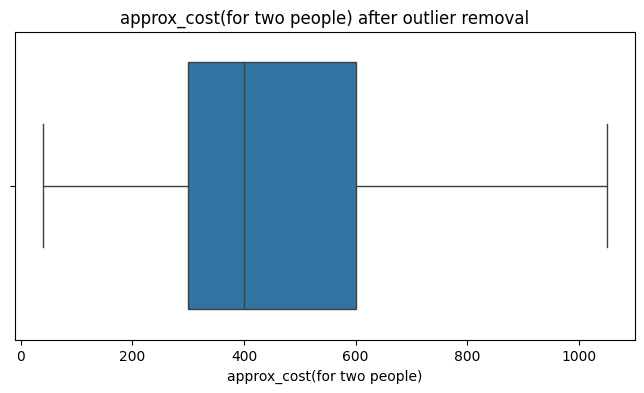

In [ ]:
for column in ['rate', 'votes', 'approx_cost(for two people)']:
      Q1 = df[column].quantile(0.25)
      Q3 = df[column].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in ['rate', 'votes', 'approx_cost(for two people)']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"{column} after outlier removal")
    plt.show()


In [ ]:
df.shape

(35062, 10)

**checking the skewnees after outlier removal**

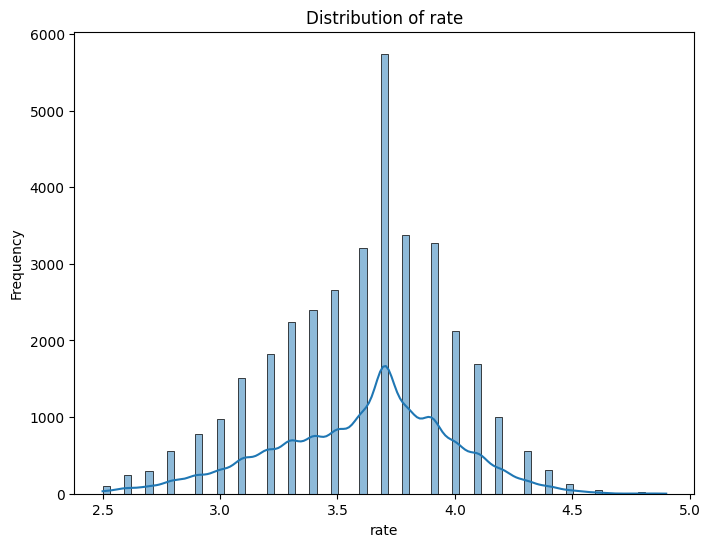

Skewness of rate: -0.3442943972414415


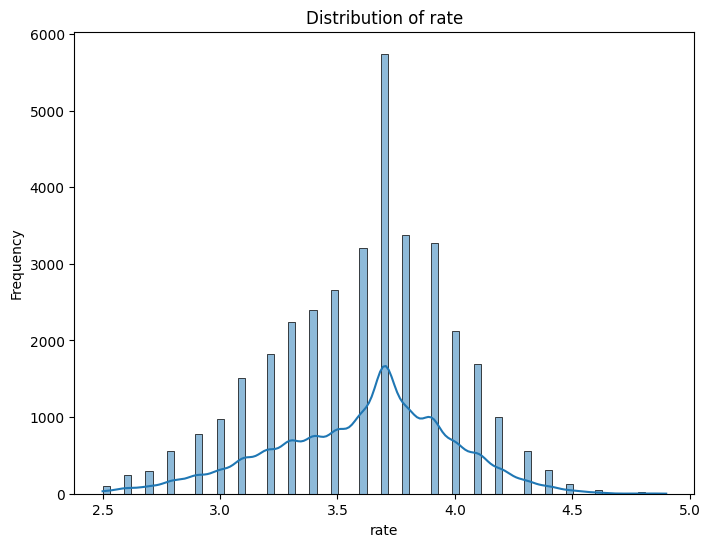

Skewness of rate: -0.3442943972414415


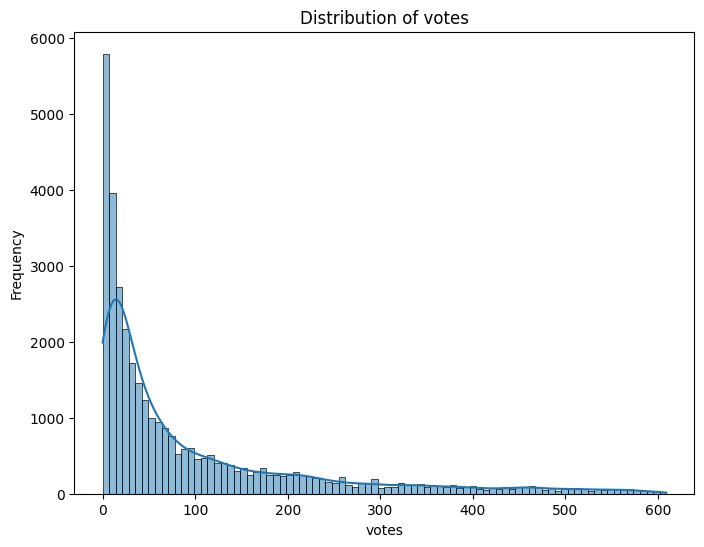

Skewness of votes: 1.881190340469012


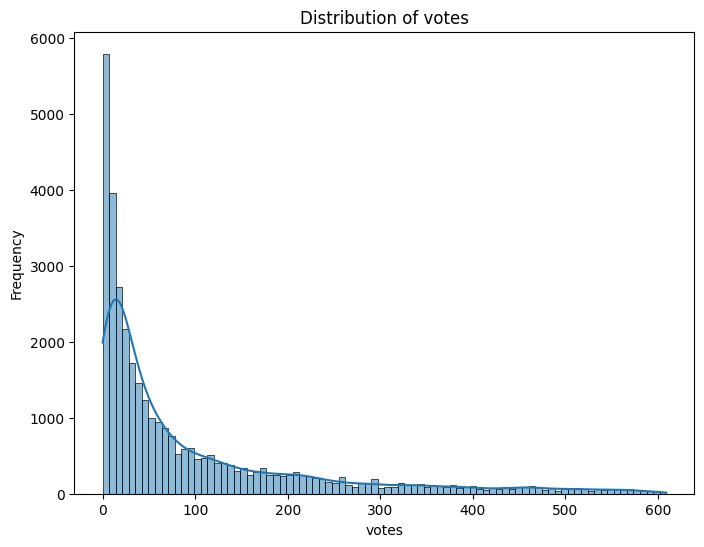

Skewness of votes: 1.881190340469012


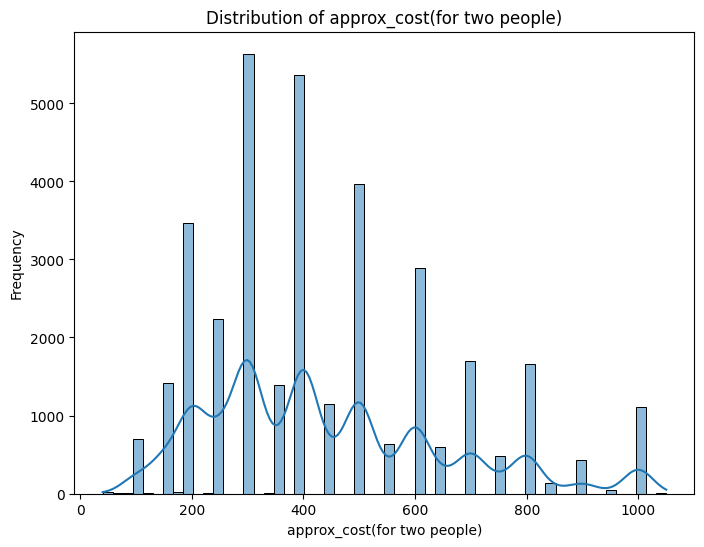

Skewness of approx_cost(for two people): 0.7597786646394408


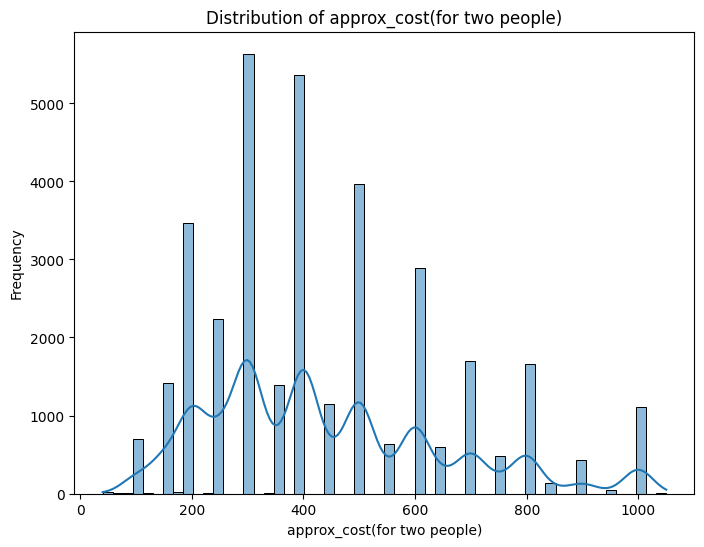

Skewness of approx_cost(for two people): 0.7597786646394408


In [ ]:

for column in ['rate', 'votes', 'approx_cost(for two people)']:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    print(f"Skewness of {column}: {df[column].skew()}")

it seems that the skewneess for the votes is left skewed and the rest is normal, if we try and remove it, it will rmeove half of the data so we will keep it without removing anymore o

**checking the precent of the outliers**

In [ ]:
#check the precentage of the outliers after removing them
numerical_columns = ['rate', 'votes', 'approx_cost(for two people)']

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    print(f"Column: {column}")
    print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Column: rate
Percentage of outliers: 1.03%
Column: votes
Percentage of outliers: 9.02%
Column: approx_cost(for two people)
Percentage of outliers: 0.00%


In [ ]:
df.dtypes

,0
online_order,object
book_table,object
rate,float64
votes,int64
location,object
rest_type,object
cuisines,object
approx_cost(for two people),float64
listed_in(type),object
listed_in(city),object


In [ ]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari
5,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet,Banashankari
6,No,No,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,Buffet,Banashankari
8,Yes,No,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700.0,Cafes,Banashankari


# **RESEARCH QUESTIONS**


# **1. What factor influences customer ratings for restaurants?**

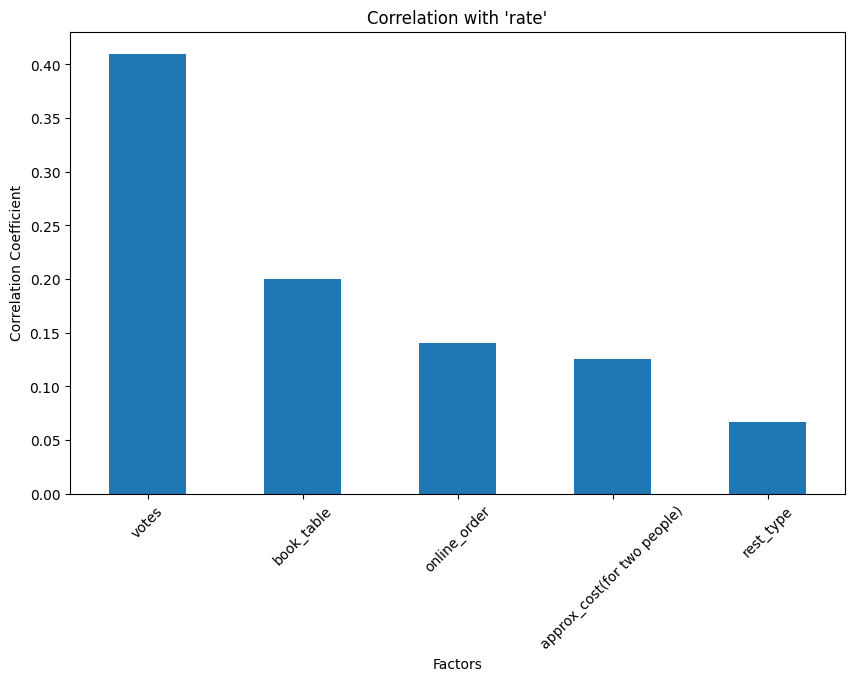

In [ ]:
# Checking correlations
factors = ['online_order', 'book_table', 'votes', 'approx_cost(for two people)', 'rest_type', 'rate']
df_corr = df[factors].copy()

# Transform categorical variables into numeric
df_corr[factors] = df_corr[factors].apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

# Calculate correlation with 'rate'
correlation = df_corr.corr()['rate'].sort_values(ascending=False)

# Visualize the correlation as a bar plot
correlation.drop('rate').plot(kind='bar', figsize=(10, 6))
plt.title("Correlation with 'rate'")
plt.xlabel("Factors")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()

**Votes strongly influence customer ratings, showing the highest positive correlation with rate. More votes indicate higher engagement, leading to greater satisfaction and better ratings.**

# **2. Do restaurants offering online orders have higher ratings or more votes?**

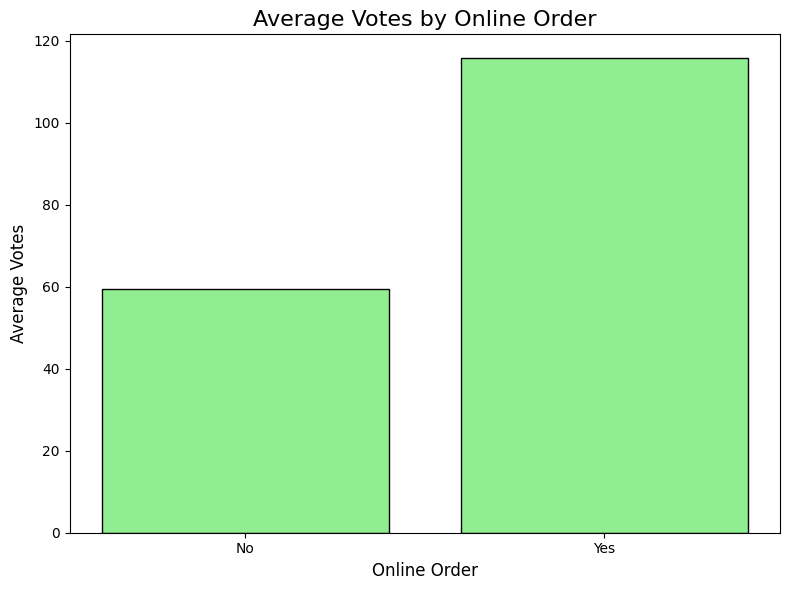

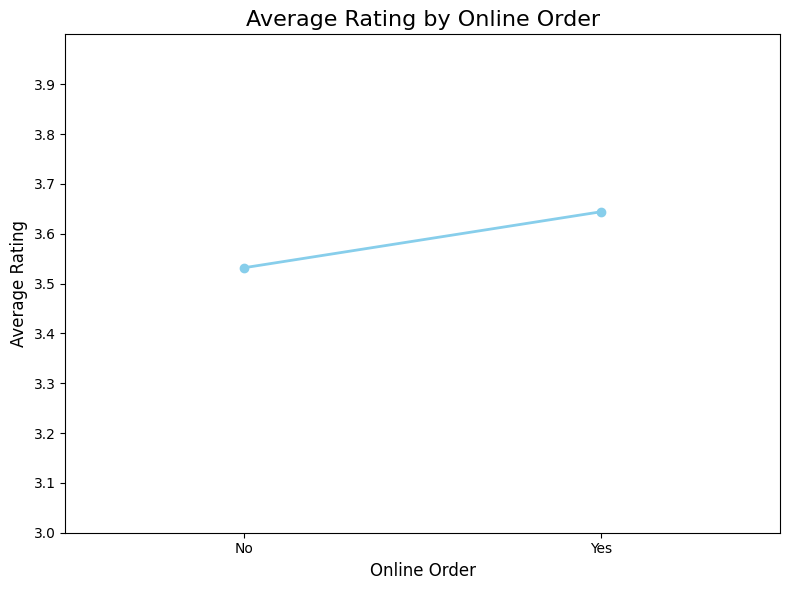

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'online_order' and calculate the mean for 'rate' and 'votes'
online_order_analysis = df.groupby('online_order').agg({'rate': 'mean', 'votes': 'mean'})

# Separate visualizations for votes and ratings
x = online_order_analysis.index
x_pos = range(len(x))

# Plot 1: Average Votes
plt.figure(figsize=(8, 6))
plt.bar(x_pos, online_order_analysis['votes'], color='lightgreen', edgecolor='black')
plt.title('Average Votes by Online Order', fontsize=16)
plt.xlabel('Online Order', fontsize=12)
plt.ylabel('Average Votes', fontsize=12)
plt.xticks(x_pos, x, fontsize=10)
plt.tight_layout()
plt.show()

# Plot 2: Average Rating
plt.figure(figsize=(8, 6))
plt.plot(x_pos, online_order_analysis['rate'], color='skyblue', marker='o', linewidth=2)
plt.title('Average Rating by Online Order', fontsize=16)
plt.xlabel('Online Order', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(x_pos, x, fontsize=10)

# Set the x-axis limits
plt.xlim([-0.5, 1.5])  # Adjust the values as needed

# Set the y-axis limits and ticks
plt.ylim(3, 4)
plt.yticks(np.arange(3, 4, 0.1))  # Adjust the step (0.1) as needed

plt.tight_layout()
plt.show()

**Restaurants offering online orders tend to receive more votes, indicating higher customer engagement. However, the ratings are only slightly higher for restaurants with online ordering.**

# **3. How does the availability of table booking affect customer ratings and votes?**

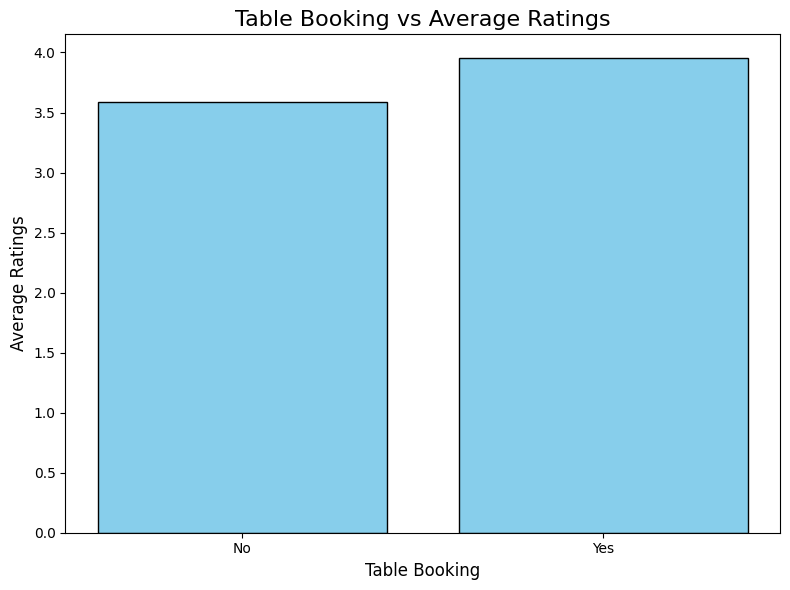

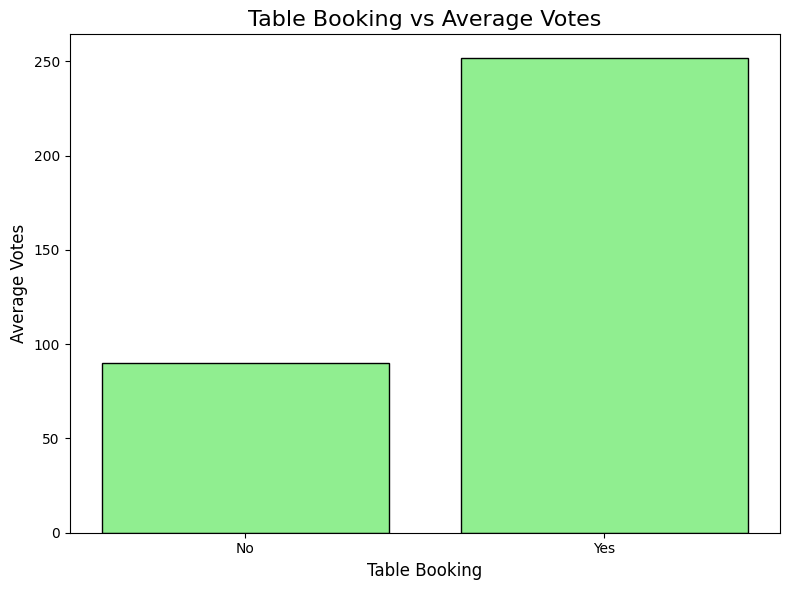

In [ ]:
table_booking_analysis = df.groupby('book_table').agg({'rate': 'mean', 'votes': 'mean'})

# Plot 1: Average Ratings
plt.figure(figsize=(8, 6))
plt.bar(table_booking_analysis.index, table_booking_analysis['rate'], color='skyblue', edgecolor='black')
plt.title('Table Booking vs Average Ratings', fontsize=16)
plt.xlabel('Table Booking', fontsize=12)
plt.ylabel('Average Ratings', fontsize=12)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

# Plot 2: Average Votes
plt.figure(figsize=(8, 6))
plt.bar(table_booking_analysis.index, table_booking_analysis['votes'], color='lightgreen', edgecolor='black')
plt.title('Table Booking vs Average Votes', fontsize=16)
plt.xlabel('Table Booking', fontsize=12)
plt.ylabel('Average Votes', fontsize=12)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()


**Restaurants with table booking have slightly higher ratings and significantly more votes, indicating greater popularity.**

# **4. Do certain restaurant types - e.g., cafés, bars, fine dining - tend to have better ratings?**

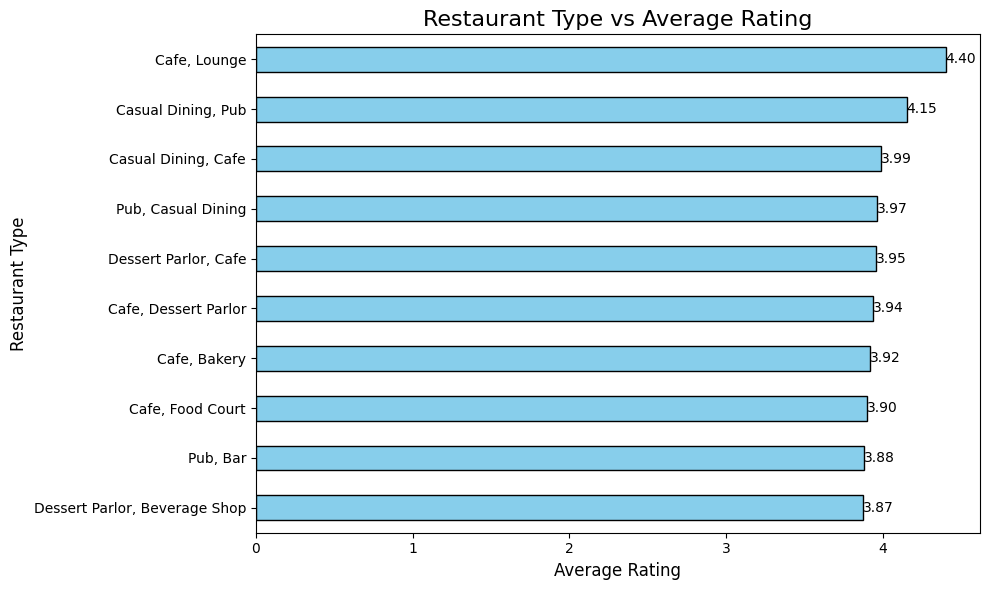

In [ ]:
restaurant_type_analysis = df.groupby('rest_type')['rate'].mean().sort_values(ascending=False)

# Improved visualization with horizontal bar chart
plt.figure(figsize=(10, 6))
restaurant_type_analysis.head(10).sort_values(ascending=True).plot(
    kind='barh', color='skyblue', edgecolor='black'
)
plt.title('Restaurant Type vs Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Restaurant Type', fontsize=12)

# Add data labels
for index, value in enumerate(restaurant_type_analysis.head(10).sort_values(ascending=True).values):
    plt.text(value, index, f"{value:.2f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

**Certain restaurant types, such as Café Lounge, Casual Dining Pub, and Casual Dining Café tend to have higher average ratings. However, the differences in ratings across the top restaurant types are minor, indicating similar quality levels for these popular categories.**

# **5. Which cities tend to have the highest-rated restaurants?**

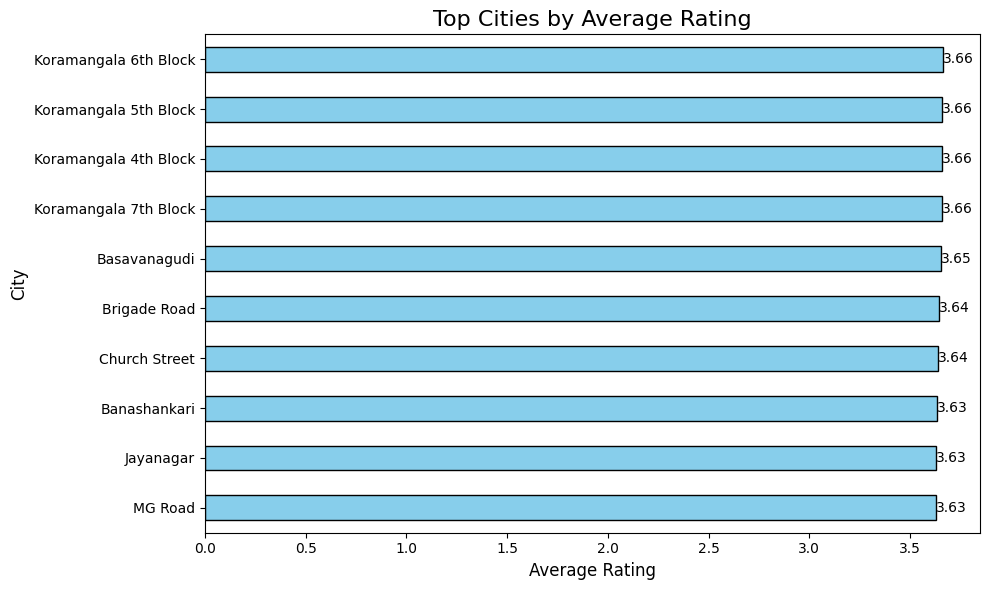

In [ ]:
city_rating_analysis = df.groupby('listed_in(city)')['rate'].mean().sort_values(ascending=False)

# Improved visualization with horizontal bars and annotations
plt.figure(figsize=(10, 6))
city_rating_analysis.head(10).sort_values(ascending=True).plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top Cities by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('City', fontsize=12)

# Add data labels
for index, value in enumerate(city_rating_analysis.head(10).sort_values(ascending=True).values):
    plt.text(value, index, f"{value:.2f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

**The cities that tend to have the highest-rated restaurants are Koramangala 6th, 5th, 4th and 7th Block, with average ratings around 3.66. However, there is no significant difference in the ratings between these cities, indicating that the quality of restaurants across these top locations is fairly consistent.**

# **6. Does location significantly impact a restaurant's popularity?**

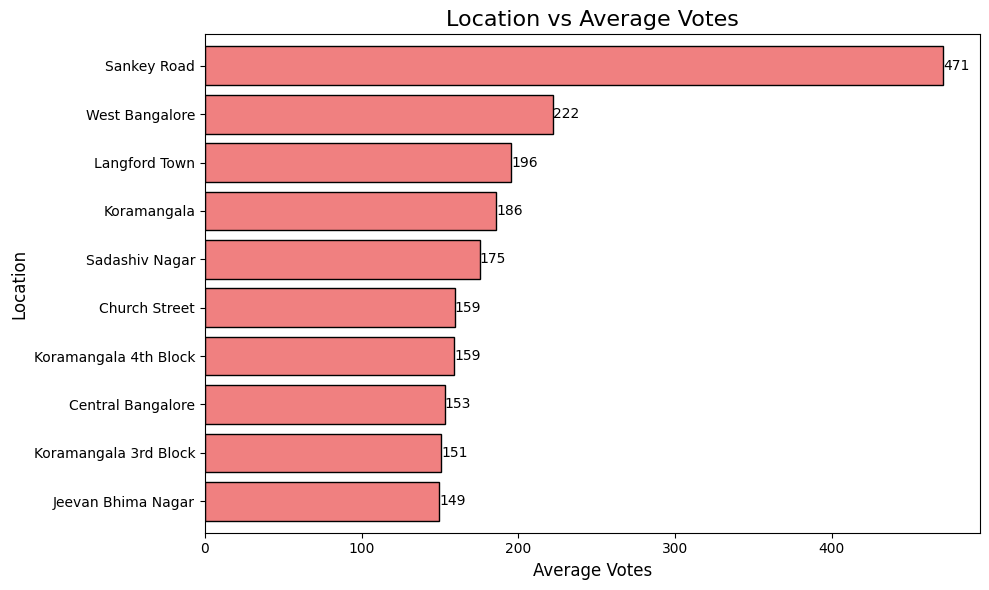

In [ ]:
location_votes_analysis = df.groupby('location')['votes'].mean().sort_values(ascending=False)

# Improved visualization with horizontal bars and annotations
plt.figure(figsize=(10, 6))
location_votes_analysis.head(10).plot(kind='barh', color='lightcoral', edgecolor='black', width=0.8)
plt.title('Location vs Average Votes', fontsize=16)
plt.xlabel('Average Votes', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Add data labels
for index, value in enumerate(location_votes_analysis.head(10).values):
    plt.text(value, index, f"{value:.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

**Yes, location significantly impacts a restaurant's popularity. From the chart, certain locations like Sankey Road receive significantly higher average votes compared to others, indicating that some locations attract more customers and engagement.**

# **7. How does the type of place affect the average cost for two people?**

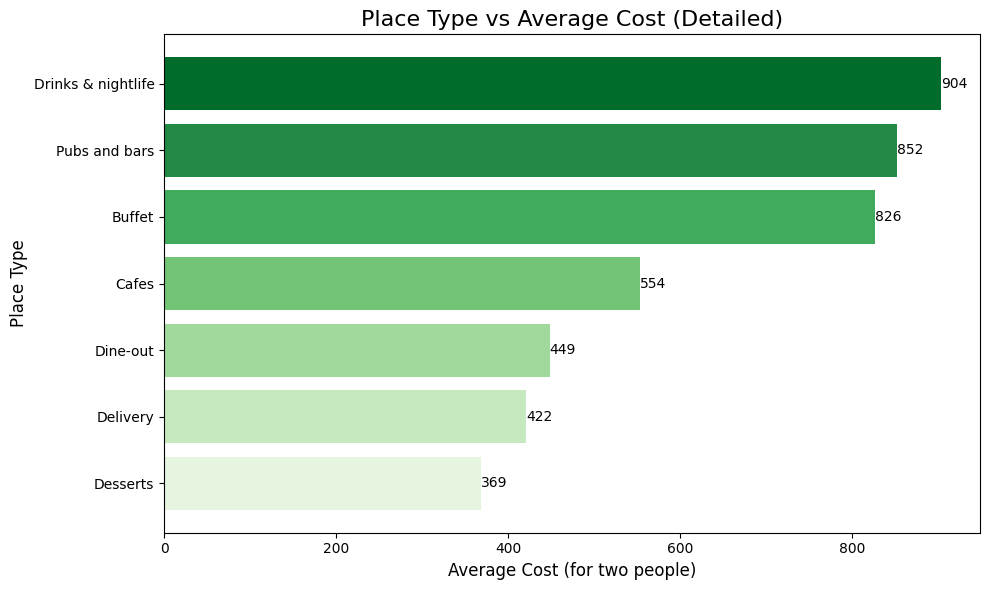

In [ ]:
place_cost_analysis = df.groupby('listed_in(type)')['approx_cost(for two people)'].mean().sort_values(ascending=False)

# Sort the data for better visualization
place_cost_analysis_sorted = place_cost_analysis.sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(place_cost_analysis_sorted.index, place_cost_analysis_sorted.values, color=sns.color_palette("Greens", len(place_cost_analysis_sorted)))

# Add data labels
for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.0f}",
        va='center',
        fontsize=10
    )

# Customization
plt.title('Place Type vs Average Cost (Detailed)', fontsize=16)
plt.xlabel('Average Cost (for two people)', fontsize=12)
plt.ylabel('Place Type', fontsize=12)
plt.tight_layout()
plt.show()

**More formal types of dining such as Drinks & nightlife and Pubs and Bars tend to have higher average costs compared to others like Delivery or Desserts, which might focus more on convenience or quick service.**

# **8. How does the availability of table booking influence the affordability of dining options?**

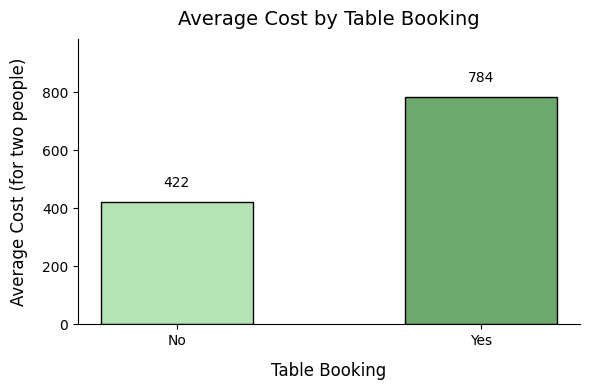

In [ ]:
# Grouping by online_order with mean costs
online_order_analysis = df.groupby('online_order')['approx_cost(for two people)'].mean()

# Grouping by book_table with mean costs
table_booking_analysis = df.groupby('book_table')['approx_cost(for two people)'].mean()

# Prepare the data
book_table_means = df.groupby('book_table')['approx_cost(for two people)'].mean()

# Plot for Table Booking
plt.figure(figsize=(6, 4))
plt.bar(
    book_table_means.index,
    book_table_means.values,
    color=['#B6E3B5', '#6DA96C'],
    edgecolor='black',
    width=0.5
)
plt.title('Average Cost by Table Booking', fontsize=14, pad=10)
plt.xlabel('Table Booking', fontsize=12, labelpad=10)
plt.ylabel('Average Cost (for two people)', fontsize=12, labelpad=10)
plt.xticks([0, 1], labels=['No', 'Yes'], fontsize=10)
plt.ylim(0, max(book_table_means.values) + 200)  # Add some padding to the top of the y-axis

# Add data labels
for index, value in enumerate(book_table_means):
    plt.text(index, value + 50, f'{value:.0f}', ha='center', fontsize=10, color='black')

# Remove spines for minimal look
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

**It is significantly more costly to dine at places that offer table bookings, as these restaurants are geared towards providing a premium dining experience.**